<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Optimizer_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALL about optimizers


<img align="left" width="300" src="https://logopond.com/logos/e1b4b37b90e11dc21ec3ca76508a4804.png">

<img align="left" width="200"  src="https://storage.needpix.com/rsynced_images/emoji-2304720_1280.png">

# Table of contents
1. Load data from tensorflow.
2. Building model.
3. What are optimzers?
4. optimizers
    1. Gradient Descent
    2. Stochastic Gradient Descent
    3. Momentum
    4. AdaGrad
    5. AdaDelta
    6. Adam
    7. Mini-Batch Gradient Descent
    8. Root Mean Squared Propagation (RMSprop)
    9. Nesterov Accelerated Gradient (NAG)
    10. Follow The Regularized Leader (FTRL)


    

In [1]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt



# Load Dataset

In [2]:
# Get data mnist data from tensorflow
mnist = tf.keras.datasets.mnist


In [3]:
# load data in x_train, y_train, x_tets, y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# scale the data by dividing dataset by 255.0
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Building model

In [4]:
# create a modle using sequential
model = Sequential([
           # add Flatten layer with input shape 28,28
           tf.keras.layers.Flatten(input_shape=(28, 28)),

           # add dense layer with units 128 and activation relu
           tf.keras.layers.Dense(128, activation='relu'),

           # add a dropout layer
           tf.keras.layers.Dropout(0.2),

           # add a dense layer with number of class as units.
           tf.keras.layers.Dense(10)


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Optimizers

Optimizers are the expanded class, which includes the method to train your machine/deep learning model. Right optimizers are necessary for your model as they improve training speed and performance, Now there are many optimizers algorithms we have in TensorFlow library and we will learn to implement those.

# Gradient Descent

![link text](http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

Gradient Descent is the most basic but most used optimization algorithm. It is used heavily in linear regression and classification algorithms. Backpropagation in neural networks also uses a gradient descent algorithm.

Gradient descent is a first-order optimization algorithm which is dependent on the first order derivative of a loss function.  
It calculates that which way the weights should be changed so that the function can reach a minima.   
The loss is transferred from one layer to another and the model's parameters also known as weights are modified depending on the losses so that the loss can be minimized, with the help backpropagation.  


Formula:

Cost function

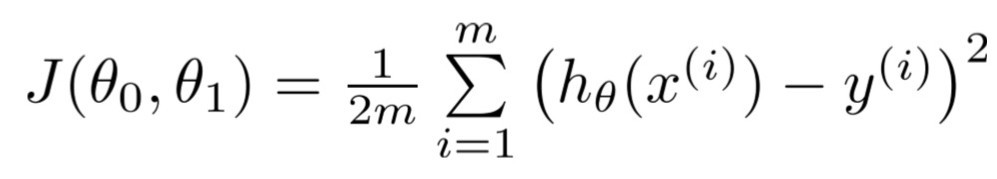

gradient descent  

![link text](https://dz2cdn1.dzone.com/storage/temp/13721096-post6-3.png)




here,

Hypothesis: h(x)  = theta0 + (theta1)(x)

Parameters: theta0, theta1



# Note: We don't use simple gradient descent in deeplearning instead we use Stochastic gradient descent

# Stochastic Gradient Descent

Stochastic gradient descent algorithms are modification of gradient descent. It is a popular algorithm for training a wide range of models in machine learning, including (linear) support vector machines, logistic regression. It is used in neural network when combined with backpropagation algorithm.


In SGD, you calculate the gradient using just a random small part of the observation instead of all of them. This approach reduces computation in some cases.

Formula:

Cost function

![link text](https://media.geeksforgeeks.org/wp-content/uploads/20200611183126/223-1.png)

Stochastic gradient descent

![link text](https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png)



Frequently updates the model hence take less time to converge.

Requires less memory usage as there is no need to store values of loss functions.



In [6]:
# import SGD from tensorflow library
from keras.optimizers import SGD
# set a variable optimizer to SGD(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt = SGD(learning_rate=0.01)

# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))


We used Sparse categorical cross-entropy as loss function as the classes/labels we have are in interger format.

In [7]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0785 - val_loss: 0.3641
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.4031 - val_loss: 0.2992
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3399 - val_loss: 0.2614
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2945 - val_loss: 0.2361
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2699 - val_loss: 0.2158
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2499 - val_loss: 0.1993
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2313 - val_loss: 0.1854
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2089 - val_loss: 0.1740
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2038 - val_loss: 0.1634
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1898 - val_loss: 0.1568


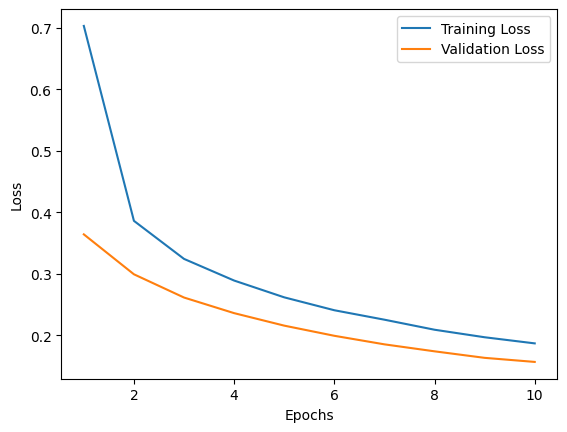

In [8]:
# Define training loss from history of model
train_loss = history.history['loss']

# Define validation loss from history of model
val_loss = history.history['val_loss']

# create a list of number of epochs done while training
epochs = list(range(1,11))


# plot line plot of Training Loss
plt.plot(epochs,train_loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# For more details refer the official tensorflow document of SGD

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

# Mini-Batch Gradient Descent

It is a imporved version of both gradient descent and stocashtic gradient descent. The functioning of the optimizer is that it updates the model parameters after every batch.

Thus we need to divide the dataset into various batches and then after each batch the model's parameters gets updated.

In this example we took batch size as 20.

Formula:

![link text](https://miro.medium.com/proxy/0*OUP4nPolDo1yt5cY)

In the above formula the N=6 that is the batch size.

In [9]:
# import SGD from tensorflow library
from tensorflow.keras.optimizers import SGD


# set a variable optimizer to SGD(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=SGD(learning_rate=0.01)


# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))



Fit the model using batch size = 20
you can choose any value in range from 1 to length of train data.

In [10]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10,batch_size=20)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1782 - val_loss: 0.1449
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1633 - val_loss: 0.1376
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1627 - val_loss: 0.1287
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1502 - val_loss: 0.1245
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1386 - val_loss: 0.1177
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1342 - val_loss: 0.1130
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1291 - val_loss: 0.1078
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1218 - val_loss: 0.1052
Epoch 9/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1170 - val_loss: 0.1020
Epoch 10/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1127 - val_loss: 0.0975


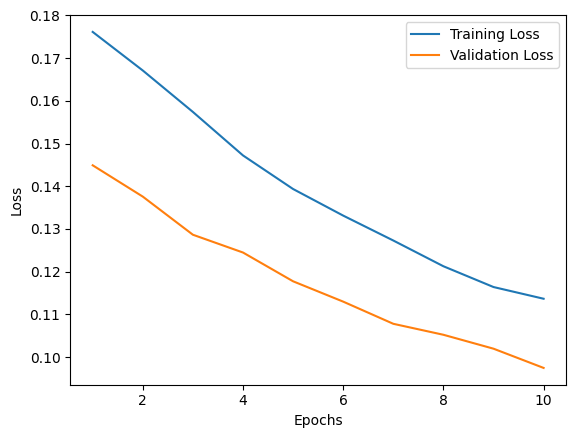

In [11]:
# Define training loss from history of model
loss=history.history['loss']

# Define validation loss from history of model
val_loss=history.history['val_loss']

# create a list of number of epochs done while training
epochs=list(range(1,11))

# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')

# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






# Momentum

In gradient descent the convergence happens very slowly as the gradinet at the gentle slope becomes smaller thus it takes much more time to update.

Momentu mas invented for this problem.

## Now question is, what is Momentum?

Momentum acceleartes the convergence towards the relevant direction and reduces the fluctuation to the irrelevant direction.

## How it works?

It looks at current as well as history of updates. If the history and current updates are same that means that the gradient is converging in right direction and it will gain acceleration.

Formual:  
![link text](https://miro.medium.com/max/1000/1*j1KgFRNO4qHXz4QJMLoFfQ.png)


As compared to gradient descent the momentum based gradient descent is able to take larger steps because of the momentum it gained in direction it keeps on getting faster.

## Note:

Momentum based gradient decent has a problem. It oscillates in and out of the minima valley as the momentum carries it out of the valley, it takes lot of u-turns before finally converging Despite these u-turns it still converges faster than simple gradient.

in simple terms becuase of momentumit gained it misses the minima valley and take a u-turn to get back to minima and again misses by some distance and keeps trying to get to minima.

Even after having this problem, it reaches the minima faster than simple gradient descent.

The value for the hyperparameter is defined in the range 0.0 to 1.0 and often has a value close to 1.0, such as 0.8, 0.9, or 0.99. A momentum of 0.0 is the same as gradient descent without momentum.


## Disadvantage:

One more hyper-parameter is added which needs to be selected manually and accurately.

In [12]:

# import SGD from tensorflow library
from tensorflow.keras.optimizers import SGD


# set a variable optimizer to SGD(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0') and momentum = 'any value in range 0.0 to 1.0'
opt=SGD(learning_rate=0.01,momentum=0.9)



# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))




In [13]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1189 - val_loss: 0.0988
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1060 - val_loss: 0.0876
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0898 - val_loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0806 - val_loss: 0.0741
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0748 - val_loss: 0.0711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0693 - val_loss: 0.0675
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0626 - val_loss: 0.0713
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0552 - val_loss: 0.0687
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0534 - val_loss: 0.0641
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0518 - val_loss: 0.0635


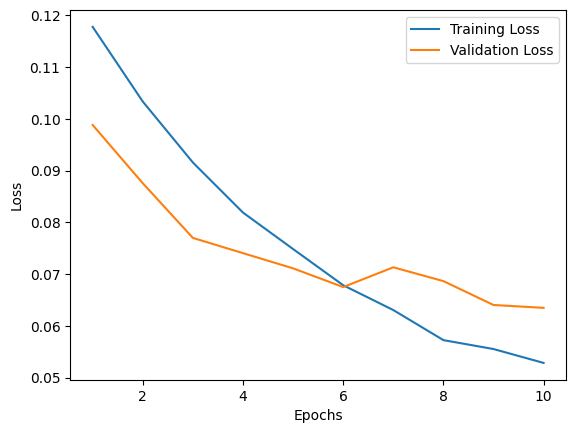

In [14]:
# Define training loss from history of model
loss=history.history['loss']


# Define validation loss from history of model
val_loss=history.history['val_loss']


# create a list of number of epochs done while training
epochs=list(range(1,11))


# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')

# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





# For more details refer the official tensorflow document of SGD with momentum

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

# AdaGrad (Adaptive gradient)

Assume that there is dataset whci has consisting of both dense features and sparse feature. During training if learning rate is fixed to some value (for eg lr = 0.001) then training happens with same learning rate across the dataset.

The above statement sounds good.
But wait there is a problem here.

## Problem:

If the feature is dense then there updates will be fatser and when the feature are sparse then updates will be slower.
hence, the convergence is slower because of this problem.

To avoid this problem AdaGrad (Adaptive gradient) was invented.

## What is AdaGrad?

In AdaGrad there are different learning rates for different features at each iteration.

# How it works?

If the feature undergone more updates then make learning rate smaller else if the feature undergone lesser updates make learning rate smaller.


For parameters associated with frequently occuring features it performs smaller updates.

For parameters associated with infrequent features it performs larger updates.

Formula:
![link text](https://miro.medium.com/max/1313/1*8a-kA2QHel7VbeuVIrwwUg.png)


## Note:

### There is a problem with this approach. If the vt in denominator becomes larger then learning rate becomes very small resulting in "very small convergence" and "vanishing gradient problem"



In [15]:
# import Adagrad from tensorflow library
from tensorflow.keras.optimizers import Adagrad


# set a variable optimizer to Adagrad(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=Adagrad(learning_rate=0.01)


# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))




In [16]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0448 - val_loss: 0.0606
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0384 - val_loss: 0.0588
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0373 - val_loss: 0.0595
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0366 - val_loss: 0.0591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0358 - val_loss: 0.0601
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0359 - val_loss: 0.0593
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0336 - val_loss: 0.0583
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0371 - val_loss: 0.0587
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0349 - val_loss: 0.0590
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0339 - val_loss: 0.0582


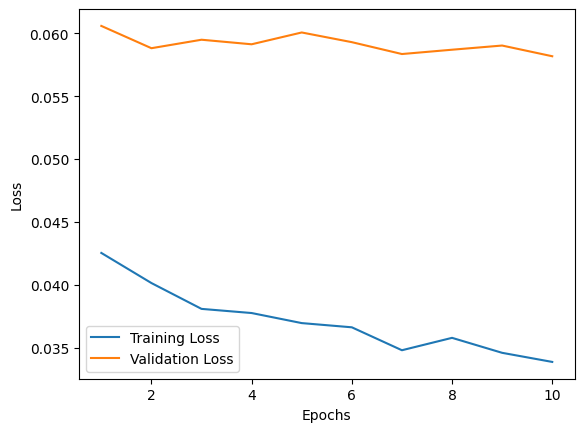

In [17]:
# Define training loss from history of model
loss=history.history['loss']


# Define validation loss from history of model
val_loss=history.history['val_loss']


# create a list of number of epochs done while training
epochs=list(range(1,11))


# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





# For more details refer the official tensorflow document of Adagrad

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad

# AdaDelta

AdaDelta is a small enhancement


In AdaDelta instead simply using the square root summation of squared history gradient we use exponential decaying average(eda)

So by applying the running average we are controlling the growth of the denominator.


Formula:

![link text](https://miro.medium.com/max/812/1*TVdJhPPIaSNsQe95yKApmA.png)

In simpler words, we are using the mean of the history gradient to decay the learning rate.

In [19]:
# import Adadelta from tensorflow library
from tensorflow.keras.optimizers import Adadelta
# set a variable optimizer to Adadelta(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=Adadelta(learning_rate=0.01)

# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))




In [20]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0323 - val_loss: 0.0581
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0337 - val_loss: 0.0582
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0312 - val_loss: 0.0584
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0329 - val_loss: 0.0586
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0334 - val_loss: 0.0589
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0316 - val_loss: 0.0592
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0307 - val_loss: 0.0593
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0306 - val_loss: 0.0594
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0299 - val_loss: 0.0595
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0328 - val_loss: 0.0595


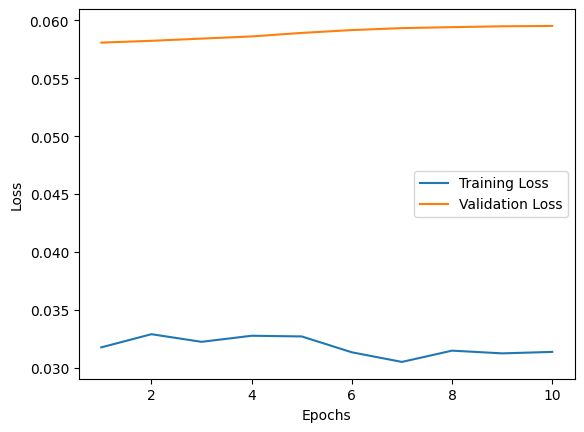

In [21]:
# Define training loss from history of model
loss=history.history['loss']

# Define validation loss from history of model
val_loss=history.history['val_loss']

# create a list of number of epochs done while training
epochs=list(range(1,11))

# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()







# For more details refer the official tensorflow document of AdaDelta

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adadelta

# Adam ( Adaptive moment estimator):

Idea of Adam optimizer is that instead of only using the exponentially weighted average of square of history of gradients,why can’t we use the exponentially weighted average of square of history of gradients.

Formula:


![link text](https://miro.medium.com/max/760/1*xSoRsmMDTZyM-GaZzYgPgA.png)


# Note:
The reason we are doing this is that we don’t want to rely too much on the current gradient and instead rely on the overall behaviour of the gradients over many timesteps

mt → 1st order moment of history of gradients.

vt → 2nd order moment of history of gradients.

In statistics, mt is similar to mean of history gradients and vt is similar to variance of history gradient.

mˆt and vˆt are bias correction for the mean and variance.

Why we need bias correction?

Mean of history gradient ≈(approximately equal) Exponentially weighted average (EWA) of history gradient.(mt) → 1

Variance of history gradient ≈(approximately equal) Exponentially weighted average of history gradient.(vt) → 2

In [22]:
# import Adam from tensorflow library
from tensorflow.keras.optimizers import Adam

# set a variable optimizer to Adam(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=Adam(learning_rate=0.01)



# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))




In [23]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3407 - val_loss: 0.1663
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.2428 - val_loss: 0.1651
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2267 - val_loss: 0.2013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2167 - val_loss: 0.1777
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1966 - val_loss: 0.2233
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2046 - val_loss: 0.1816
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1841 - val_loss: 0.1852
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1840 - val_loss: 0.1958
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1855 - val_loss: 0.1961
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1816 - val_loss: 0.2152


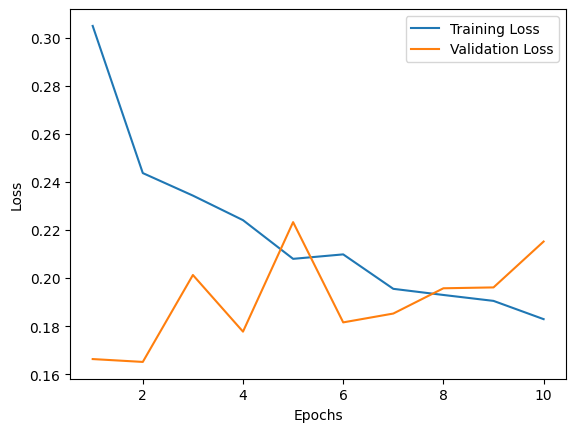

In [24]:
# Define training loss from history of model
loss=history.history['loss']

# Define validation loss from history of model
val_loss=history.history['val_loss']


# create a list of number of epochs done while training
epochs=list(range(1,11))


# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





# For more details refer the official tensorflow document of Adam

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

# Root Mean Squared Propagation (RMSprop)

RMSProp is an extension of gradient descent and the AdaGrad version of gradient descent that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.

RMSProp is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.

It is related to another extension to gradient descent called Adaptive Gradient, or AdaGrad

RMSProp is a very effective extension of gradient descent and is one of the preferred approaches generally used to fit deep learning neural networks.

Formula:

![link text](https://miro.medium.com/proxy/1*9v4BxT8pWHwJfbNXGqi7lQ.png)

In [25]:
# import RMSprop from tensorflow library
from tensorflow.keras.optimizers import RMSprop


# set a variable optimizer to RMSprop(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=RMSprop(learning_rate=0.01)


# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))




In [26]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1521 - val_loss: 0.2300
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1381 - val_loss: 0.2293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1289 - val_loss: 0.2499
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1296 - val_loss: 0.2661
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1267 - val_loss: 0.2569
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1272 - val_loss: 0.2825
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1328 - val_loss: 0.2540
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1278 - val_loss: 0.2952
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1338 - val_loss: 0.2874
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1192 - val_loss: 0.3345


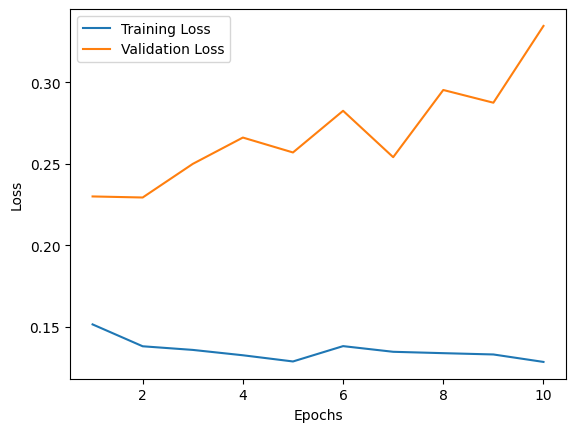

In [27]:
# Define training loss from history of model
loss=history.history['loss']

# Define validation loss from history of model
val_loss=history.history['val_loss']

# create a list of number of epochs done while training
epochs=list(range(1,11))

# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






# For more details refer the official tensorflow document of RMSprop

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

# Nesterov Accelerated Gradient (NAG):

Do you remember Momentum based optimization we just studies above?

It was having a problem of oscialltion at minima.

This problem can be solved using Nesterov Accelerated Gradient.



## What is nesterov accelerated gradient?

nesterov accelerated gradient was developed to solve issue with momentum approach.


Formual:

![link text](https://miro.medium.com/max/1016/1*ewQ9mtcJW00Dgp0ZJFNKmg.png)

We know we will be using yV(t−1) for modifying the weights so, theta−yV(t−1) approximately tells us the future location. Now, we will calculate the cost based on this future parameter rather than the current one.

In [28]:
# import SGD from tensorflow library
from tensorflow.keras.optimizers import SGD


# set a variable optimizer to SGD(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0') and nesterov = True
opt=SGD(learning_rate=0.01,nesterov=True)


# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))



In [29]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1094 - val_loss: 0.3040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0980 - val_loss: 0.2897
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0934 - val_loss: 0.2808
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0830 - val_loss: 0.2742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0781 - val_loss: 0.2680
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0827 - val_loss: 0.2630
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0746 - val_loss: 0.2574
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0675 - val_loss: 0.2560
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0695 - val_loss: 0.2532
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0729 - val_loss: 0.2498


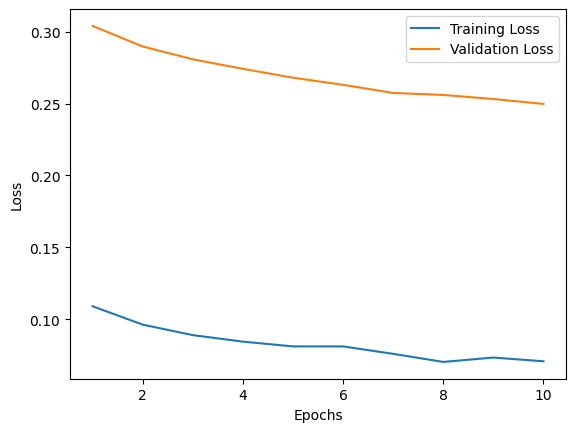

In [30]:
# Define training loss from history of model
loss=history.history['loss']


# Define validation loss from history of model
val_loss=history.history['val_loss']


# create a list of number of epochs done while training
epochs=list(range(1,11))


# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






# For more details refer the official tensorflow document of SGD with nesterov

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

# Nesterov-accelerated Adaptive Moment Estimation (Nadam)

Nadam is an extension of the Adam algorithm that incorporates Nesterov momentum and can result in better performance of the optimization algorithm.

In [31]:
# import Nadam from tensorflow library
from tensorflow.keras.optimizers import Nadam



# set a variable optimizer to Nadam(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=Nadam(learning_rate=0.01)


# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))




In [32]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1953 - val_loss: 0.3152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.1805 - val_loss: 0.2527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1776 - val_loss: 0.2347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1777 - val_loss: 0.2541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1653 - val_loss: 0.2643
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.1598 - val_loss: 0.2556
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1466 - val_loss: 0.2604
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.1604 - val_loss: 0.2732
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1603 - val_loss: 0.2857
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1464 - val_loss: 0.3110


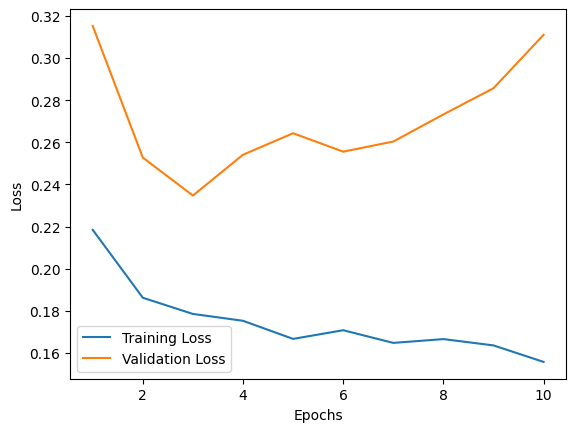

In [33]:
# Define training loss from history of model
loss=history.history['loss']


# Define validation loss from history of model
val_loss=history.history['val_loss']


# create a list of number of epochs done while training
epochs=list(range(1,11))



# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')


# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






# For more details refer the official tensorflow document of Nadam

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Nadam

# Follow The Regularized Leader (FTRL)
It is an optimization algorithm developed at Google for click-through rate prediction in the early 2010s.
FTRL is a online learning algorithms. In online learning, the learner observes a sequence of functions fi's, which can be deterministic, stochastic, or even
adversarially chosen.  It is most suitable for shallow models with large and sparse feature spaces

In [34]:

# import Ftrl from tensorflow library
from tensorflow.keras.optimizers import Ftrl



# set a variable optimizer to Ftrl(learning_rate = 'of your choice, but it should be in range 0.0 to 1.0')
opt=Ftrl(learning_rate=0.01)


# compile the model using the optimizer selected with appropriate loss function
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))





In [35]:
# fit the model for 10 epochs and store the result in history variable with train as well validation set.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 1.9921 - val_loss: 0.8402
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.8879 - val_loss: 0.4810
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6255 - val_loss: 0.3982
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.5328 - val_loss: 0.3517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.4679 - val_loss: 0.3213
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.4290 - val_loss: 0.3012
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.3949 - val_loss: 0.2826
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3745 - val_loss: 0.2655
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.3562 - val_loss: 0.2525
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3369 - val_loss: 0.2404


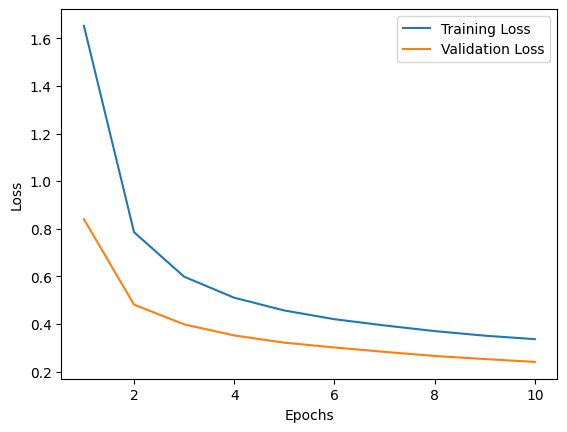

In [36]:
# Define training loss from history of model
loss=history.history['loss']

# Define validation loss from history of model
val_loss=history.history['val_loss']

# create a list of number of epochs done while training
epochs=list(range(1,11))

# plot line plot of Training Loss
plt.plot(epochs,loss,label='Training Loss')

# plot line plot of Validation Loss
plt.plot(epochs,val_loss,label='Validation Loss')


# plot line plot of Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




# For more details refer the official tensorflow document of FTRL

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Ftrl

# Assignment Summary

When creating a neural network we must select a apropriate optimizer:

### following are the optimizers  discussed in this assignment

1. Gradient Descent
2. Stochastic Gradient Descent
3. Momentum
4. AdaGrad
5. AdaDelta
6. Adam
7. Mini-Batch Gradient Descent
8. Root Mean Squared Propagation (RMSprop)
9. Nesterov Accelerated Gradient (NAG)
10. Follow The Regularized Leader (FTRL)


    




![link text](https://image.shutterstock.com/image-vector/congratulations-greeting-sign-graduation-party-260nw-1396729610.jpg)

# we have learned all the optimizers used in neural network and their properties with code

# Please fill the below feedback form about this assignment

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s